In [1]:
from blockchain import blockexplorer
from blockchain import exchangerates

In [2]:
add_list = [
    "115p7UMMngoj1pMvkpHijcRdfJNXj6LrLn",
    "12t9YDPgwueZ9NyMgw519p7AA8isjr6SMw",
    "13AM4VW2dhxYgXeQepoHkHSQuy6NgaEb94"]

In [3]:
ticker = exchangerates.get_ticker()
curr_price = ticker['USD'].p15min

print(curr_price)

1728.39


In [4]:
total_satoshi = 0.0
total_tx = 0

data = []

for add_str in add_list:
    address = blockexplorer.get_address(add_str)
    address_dict = vars(address)

    total_satoshi += address_dict['total_received']
    
    tx_list = address_dict['transactions']
    total_tx += address_dict['n_tx']
    
    for tx in tx_list:
        tx_dict = vars(tx)
        time = tx_dict['time']
        
        output_list = tx_dict['outputs']
        for output in output_list:
            o_dict = vars(output)
            
            if o_dict['address'] in add_list:
                data.append((time, o_dict['value']))

In [5]:
print("Total BTC: {}".format(total_satoshi/(10**6)))
print("Total USD: {:.2f}".format(total_satoshi*curr_price/(10**6)))

Total BTC: 4144.38383
Total USD: 7163111.57


In [6]:
import pandas as pd
import time

data.sort(key = lambda tup: tup[0])

df = pd.DataFrame(data, columns=['Epoch', 'satoshi'])
df['Datetime'] = df['Epoch'].apply(lambda t: pd.to_datetime(t, unit='s'))
df['USD'] = df['satoshi'].apply(lambda s: s*curr_price*10**(-8))
df.index = df['Datetime']
print(df.dtypes)

Epoch                int64
satoshi              int64
Datetime    datetime64[ns]
USD                float64
dtype: object


In [7]:
df.head()

,Epoch,satoshi,Datetime,USD
Datetime,,,,
2017-05-13 16:21:27,1494692487,2000000,2017-05-13 16:21:27,34.567800
2017-05-13 16:24:21,1494692661,25321436,2017-05-13 16:24:21,437.653168
2017-05-13 16:40:26,1494693626,18000000,2017-05-13 16:40:26,311.110200
2017-05-13 18:55:02,1494701702,18613000,2017-05-13 18:55:02,321.705231
2017-05-14 01:58:17,1494727097,16722501,2017-05-14 01:58:17,289.030035


In [8]:
df = df.drop(['Datetime', 'Epoch', 'satoshi'], axis=1)
df.tail()

,USD
Datetime,
2017-05-16 14:16:03,295.779381
2017-05-16 15:28:35,299.044309
2017-05-16 15:45:14,293.278400
2017-05-16 15:57:04,504.031502
2017-05-16 17:39:58,590.619883


In [9]:
df_HC = df.resample('H').count()
df_HC.columns = ["Tx"]
df_HC

,Tx
Datetime,
2017-05-13 16:00:00,3
2017-05-13 17:00:00,0
2017-05-13 18:00:00,1
2017-05-13 19:00:00,0
2017-05-13 20:00:00,0
2017-05-13 21:00:00,0
2017-05-13 22:00:00,0
2017-05-13 23:00:00,0
2017-05-14 00:00:00,0


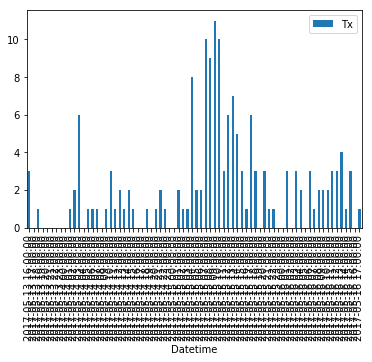

In [10]:
%matplotlib inline

df_HC.plot(kind="bar") # kind

In [11]:
df_HS = df.resample('H').sum()
df_HS = df_HS.fillna(0.0)
df_HS

,USD
Datetime,
2017-05-13 16:00:00,783.331168
2017-05-13 17:00:00,0.000000
2017-05-13 18:00:00,321.705231
2017-05-13 19:00:00,0.000000
2017-05-13 20:00:00,0.000000
2017-05-13 21:00:00,0.000000
2017-05-13 22:00:00,0.000000
2017-05-13 23:00:00,0.000000
2017-05-14 00:00:00,0.000000


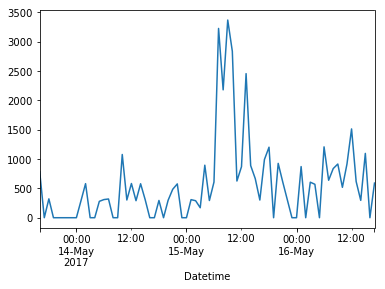

In [12]:
df_HS["USD"].plot()